In [293]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing as preprocessing
from sklearn import model_selection
from sklearn import feature_selection
from sklearn import metrics
from sklearn import ensemble
from sklearn import linear_model
from sklearn import covariance
from sklearn import impute, naive_bayes, discriminant_analysis
import plotly.express as px
import scipy
from statsmodels import api, stats
from sklearn import neural_network
import warnings
warnings.filterwarnings('ignore')
import keras
import tensorflow as tf

In [380]:
train=pd.read_csv('train_housingprice.csv')
test=pd.read_csv('test_housingprice.csv')

In [381]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [382]:
def isnull(df, features):
    for features in features:
        global null_feats
        null_feats=[features for features in df.columns if df[features].isnull().sum()>0]
        
    for feats in null_feats:
        print(f' features {feats}, has null values of {df[feats].isnull().sum()}, and percentage {np.around(df[feats].isnull().sum()*100/(len(df)),2)}%')
        print(f'{feats}, {(df[feats].isnull().sum())>(0.5*len(df.isnull()))}')
        
    global feats_max
    feats_max=[feats for feats in df[null_feats].columns if (df[feats].isnull().sum())>(0.5*len(df.isnull()))]
    print(f'{feats_max},\n\n,{df[feats_max].isnull().sum()}')

In [383]:
isnull(train, train.columns)

 features LotFrontage, has null values of 259, and percentage 17.74%
LotFrontage, False
 features Alley, has null values of 1369, and percentage 93.77%
Alley, True
 features MasVnrType, has null values of 8, and percentage 0.55%
MasVnrType, False
 features MasVnrArea, has null values of 8, and percentage 0.55%
MasVnrArea, False
 features BsmtQual, has null values of 37, and percentage 2.53%
BsmtQual, False
 features BsmtCond, has null values of 37, and percentage 2.53%
BsmtCond, False
 features BsmtExposure, has null values of 38, and percentage 2.6%
BsmtExposure, False
 features BsmtFinType1, has null values of 37, and percentage 2.53%
BsmtFinType1, False
 features BsmtFinType2, has null values of 38, and percentage 2.6%
BsmtFinType2, False
 features Electrical, has null values of 1, and percentage 0.07%
Electrical, False
 features FireplaceQu, has null values of 690, and percentage 47.26%
FireplaceQu, False
 features GarageType, has null values of 81, and percentage 5.55%
GarageType,

In [384]:
feats_max_train=feats_max
print(feats_max_train)

['Alley', 'PoolQC', 'Fence', 'MiscFeature']


In [385]:
isnull(test, test.columns)

 features MSZoning, has null values of 4, and percentage 0.27%
MSZoning, False
 features LotFrontage, has null values of 227, and percentage 15.56%
LotFrontage, False
 features Alley, has null values of 1352, and percentage 92.67%
Alley, True
 features Utilities, has null values of 2, and percentage 0.14%
Utilities, False
 features Exterior1st, has null values of 1, and percentage 0.07%
Exterior1st, False
 features Exterior2nd, has null values of 1, and percentage 0.07%
Exterior2nd, False
 features MasVnrType, has null values of 16, and percentage 1.1%
MasVnrType, False
 features MasVnrArea, has null values of 15, and percentage 1.03%
MasVnrArea, False
 features BsmtQual, has null values of 44, and percentage 3.02%
BsmtQual, False
 features BsmtCond, has null values of 45, and percentage 3.08%
BsmtCond, False
 features BsmtExposure, has null values of 44, and percentage 3.02%
BsmtExposure, False
 features BsmtFinType1, has null values of 42, and percentage 2.88%
BsmtFinType1, False
 fe

In [386]:
feats_max_test=feats_max
print(feats_max_test)

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


In [387]:
def dataCategory(df, features):
    
    global catFeat       
    catFeat=[features for features in df.columns if df[features].dtypes=='O' and features not in 'Id']
    print(catFeat)
    
    global numFeat
    numFeat=[features for features in df.columns if df[features].dtypes!='O' and features not in 'Id']
    print(numFeat)
    for features in features:
 

        if features not in 'Id' and df[features].dtypes=='O':
            global cat_feats

            cat_feats=list()

            cat_feats.append(features)
            print(f'\n categorical features: {cat_feats} \n')
            print(df[features].value_counts())
            
        elif features not in 'Id' and df[features].dtypes!='O':
            global num_feats
            num_feats=features
            print(f' \n numerical features: { features} \n')
            print(df[features].describe())
            


In [388]:
dataCategory(train, train.columns)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'Enclos

count    1460.000000
mean        0.613014
std         0.644666
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: Fireplaces, dtype: float64

 categorical features: ['FireplaceQu'] 

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

 categorical features: ['GarageType'] 

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
 
 numerical features: GarageYrBlt 

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

 categorical features: ['GarageFinish'] 

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64
 
 numerical features: GarageCars 

count    1460.000000
mean        1.767123
std         0.747315
min         0.000000
25%         1.000000
50%         2.000000
75%

In [303]:
train.dtypes!='O'

Id                True
MSSubClass        True
MSZoning         False
LotFrontage       True
LotArea           True
                 ...  
MoSold            True
YrSold            True
SaleType         False
SaleCondition    False
SalePrice         True
Length: 81, dtype: bool

In [18]:
train['MSSubClass']

0       60
1       20
2       60
3       70
4       60
        ..
1455    60
1456    20
1457    70
1458    20
1459    20
Name: MSSubClass, Length: 1460, dtype: int64

In [19]:
len(numFeat)

37

In [20]:
train[catFeat]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [21]:
train[numFeat]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


In [22]:
train[numFeat].describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


In [304]:
for feats in catFeat:
    vc=train[feats].value_counts()
    print(vc)

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Pave    1454
Grvl       6
Name: Street, dtype: int64
Grvl    50
Pave    41
Name: Alley, dtype: int64
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype:

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64


----MSZoning----




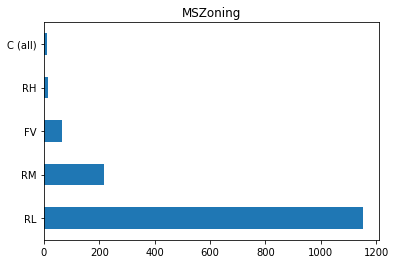

Pave    1454
Grvl       6
Name: Street, dtype: int64


----Street----




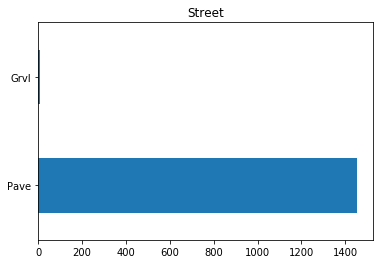

Grvl    50
Pave    41
Name: Alley, dtype: int64


----Alley----




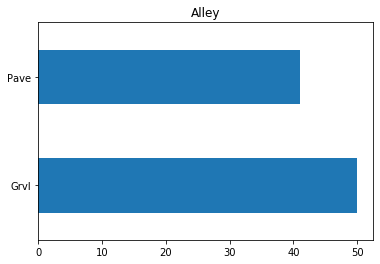

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64


----LotShape----




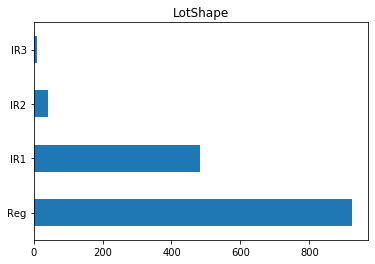

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64


----LandContour----




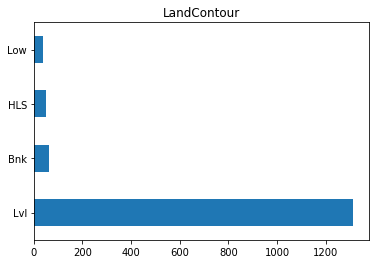

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64


----Utilities----




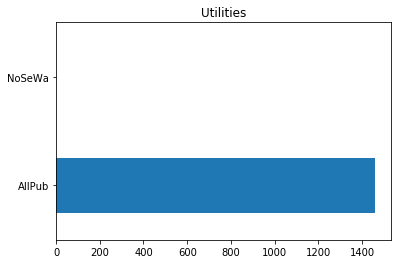

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64


----LotConfig----




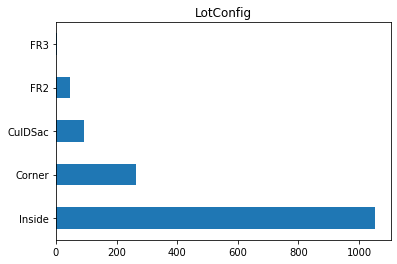

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64


----LandSlope----




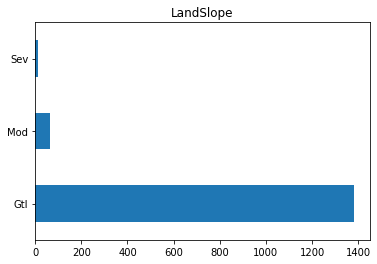

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64


----Neighborhood----




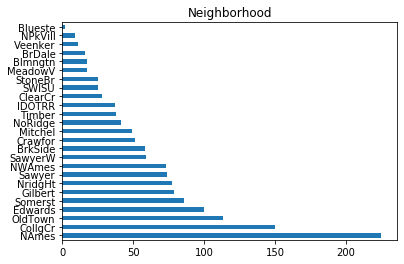

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64


----Condition1----




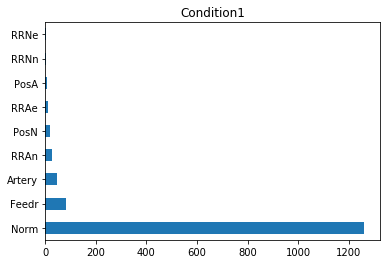

Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAe         1
RRAn         1
Name: Condition2, dtype: int64


----Condition2----




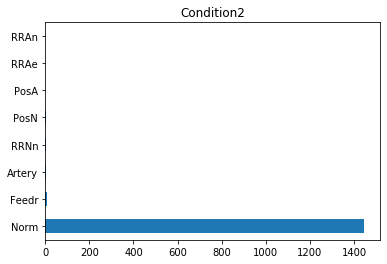

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64


----BldgType----




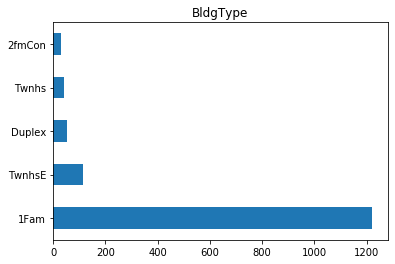

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64


----HouseStyle----




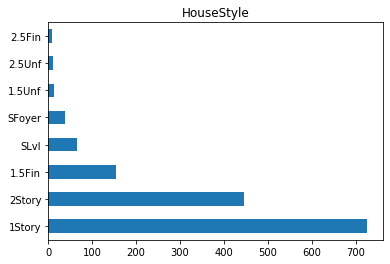

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64


----RoofStyle----




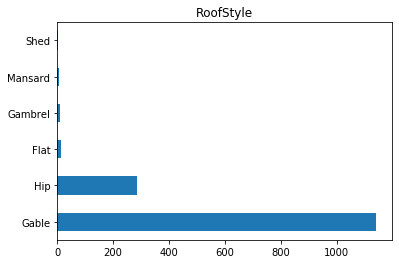

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
ClyTile       1
Roll          1
Membran       1
Name: RoofMatl, dtype: int64


----RoofMatl----




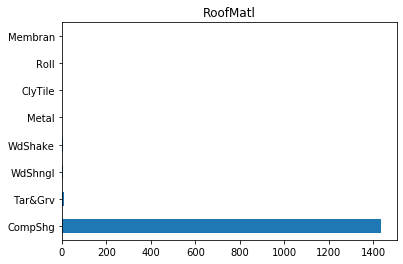

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
Stone        2
BrkComm      2
ImStucc      1
AsphShn      1
CBlock       1
Name: Exterior1st, dtype: int64


----Exterior1st----




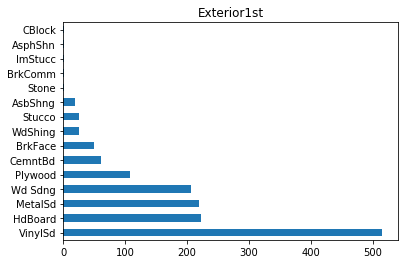

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
CBlock       1
Other        1
Name: Exterior2nd, dtype: int64


----Exterior2nd----




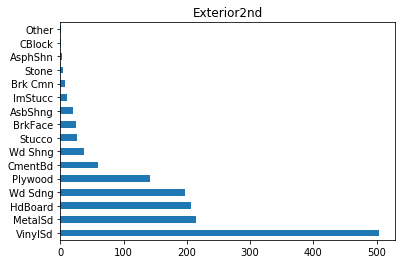

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64


----MasVnrType----




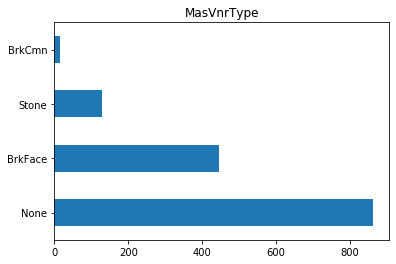

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64


----ExterQual----




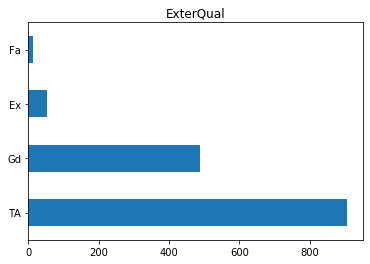

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64


----ExterCond----




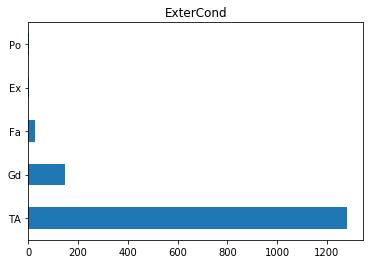

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64


----Foundation----




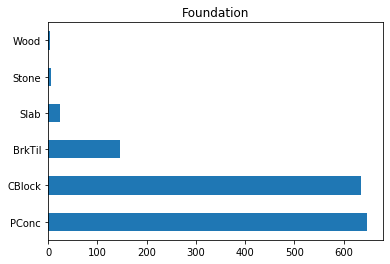

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64


----BsmtQual----




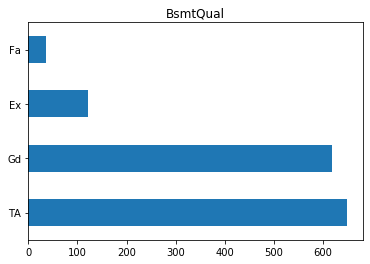

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64


----BsmtCond----




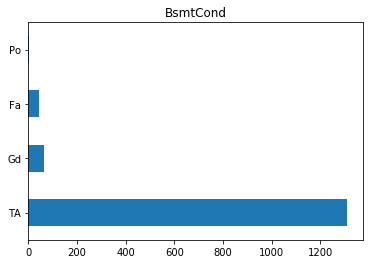

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64


----BsmtExposure----




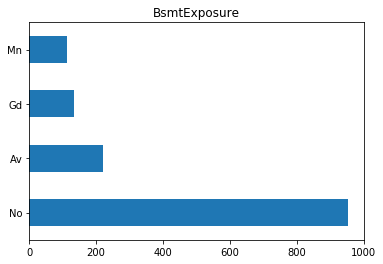

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64


----BsmtFinType1----




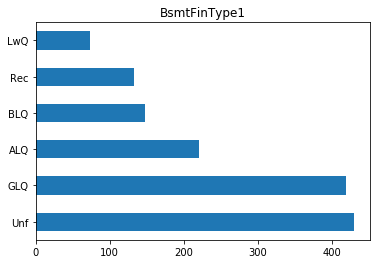

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64


----BsmtFinType2----




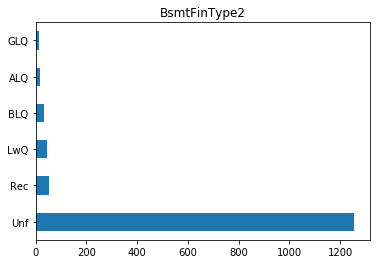

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64


----Heating----




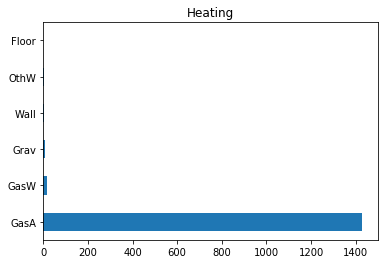

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64


----HeatingQC----




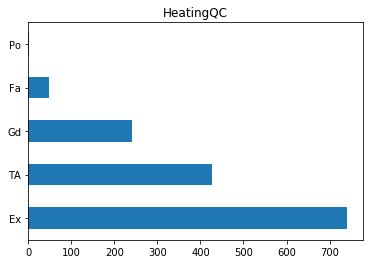

Y    1365
N      95
Name: CentralAir, dtype: int64


----CentralAir----




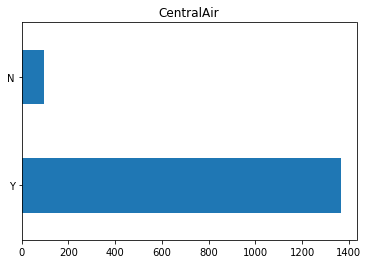

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64


----Electrical----




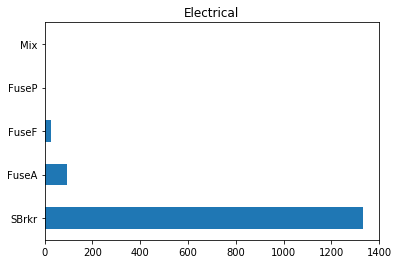

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64


----KitchenQual----




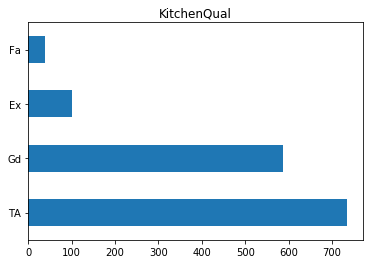

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64


----Functional----




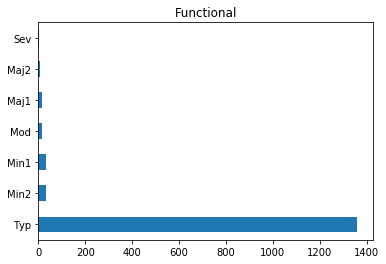

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64


----FireplaceQu----




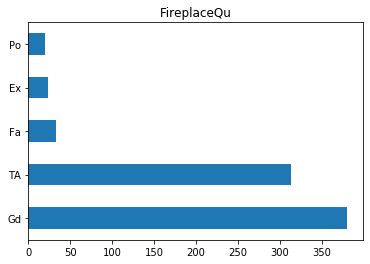

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64


----GarageType----




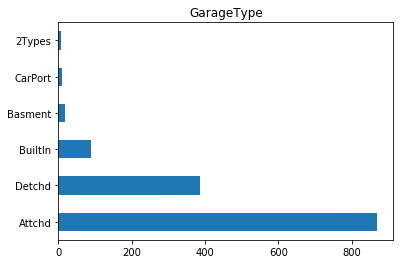

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64


----GarageFinish----




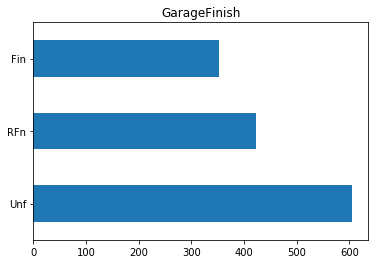

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64


----GarageQual----




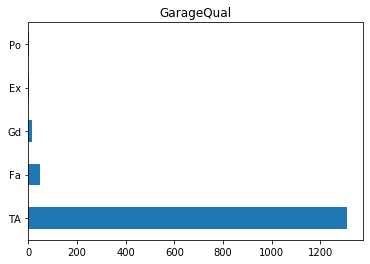

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64


----GarageCond----




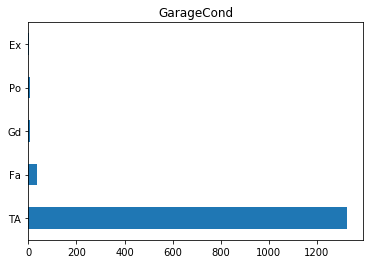

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64


----PavedDrive----




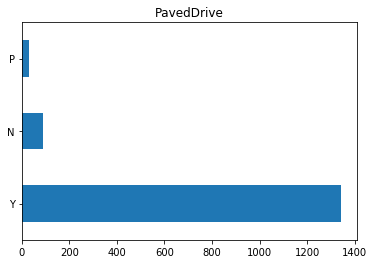

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64


----PoolQC----




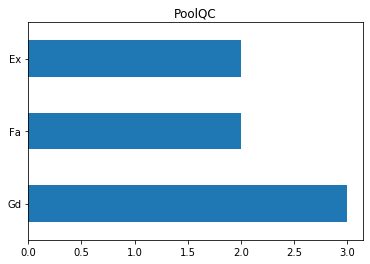

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64


----Fence----




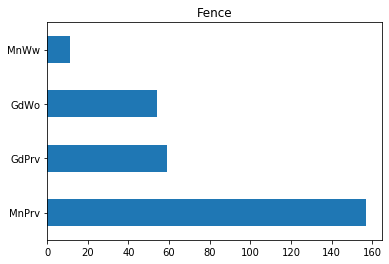

Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64


----MiscFeature----




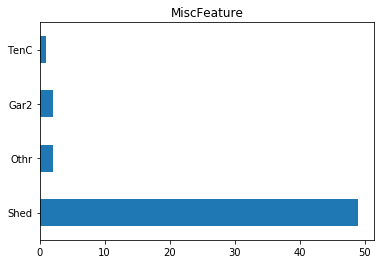

WD       1267
New       122
COD        43
ConLD       9
ConLw       5
ConLI       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64


----SaleType----




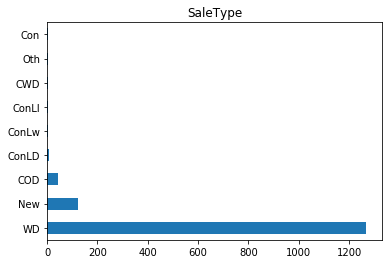

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64


----SaleCondition----




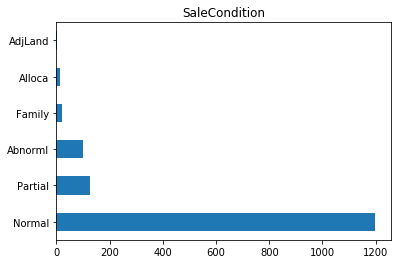

In [256]:
for feats in catFeat:
    vc=train[feats].value_counts()
    print(vc)
    print(f'\n\n----{feats}----\n\n')
    train[feats].value_counts().plot.barh()
    plt.title(feats)
    plt.show()

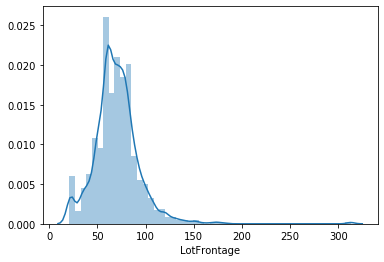

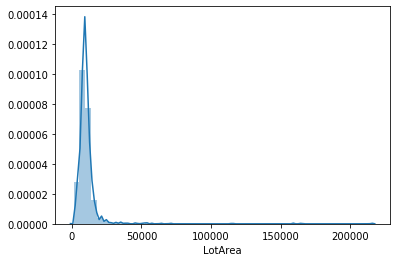

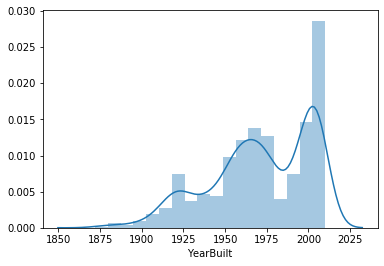

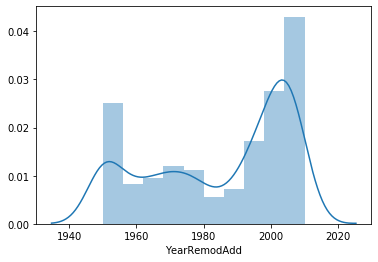

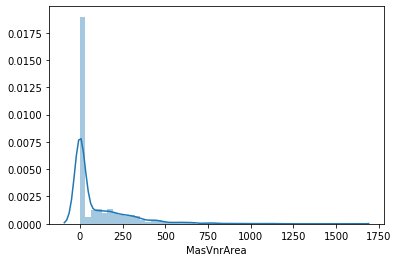

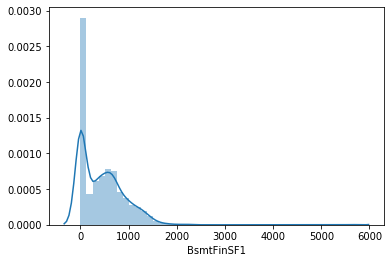

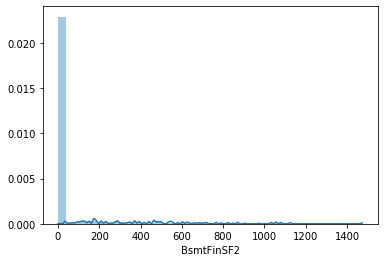

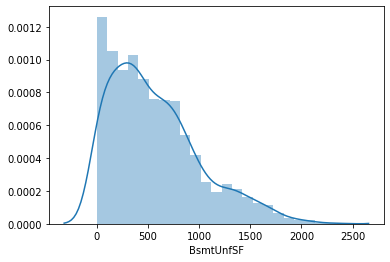

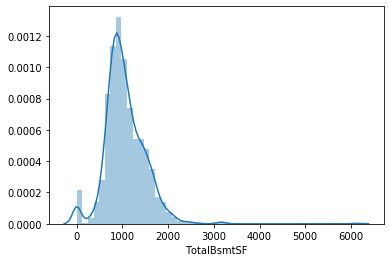

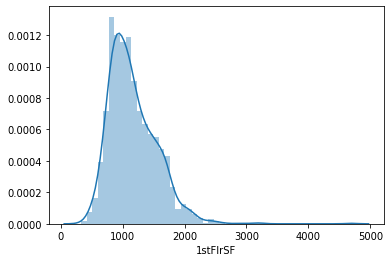

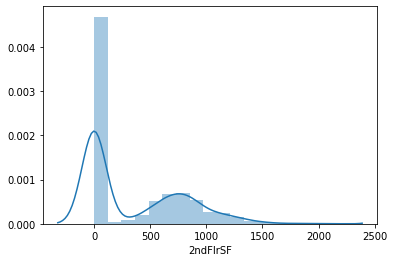

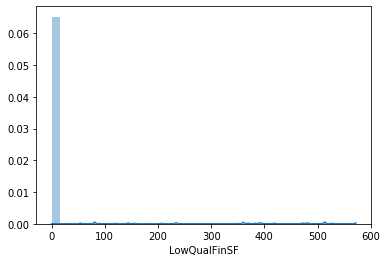

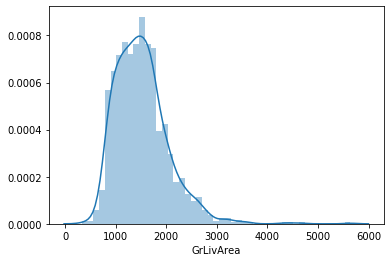

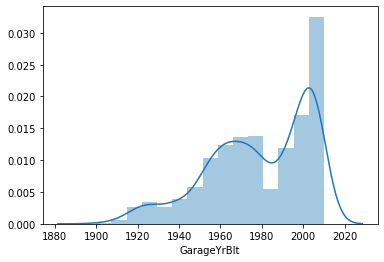

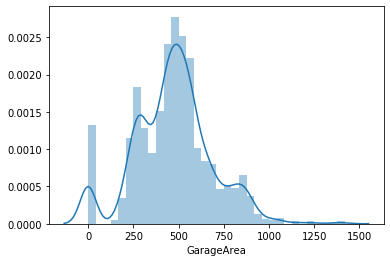

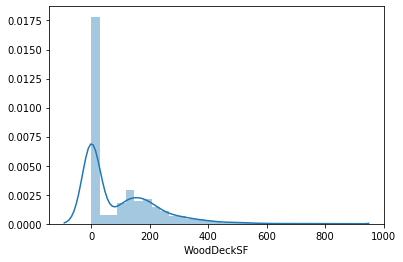

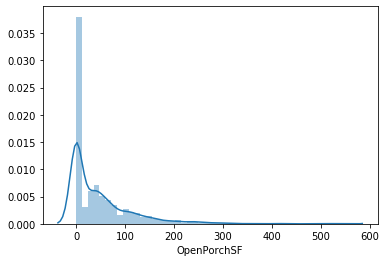

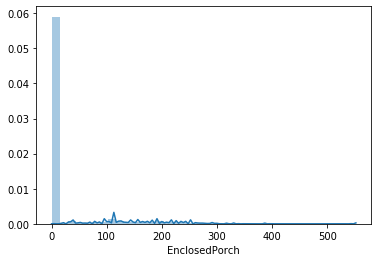

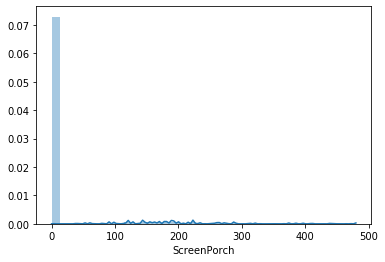

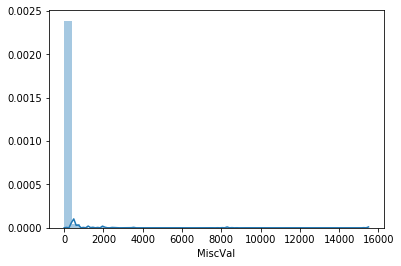

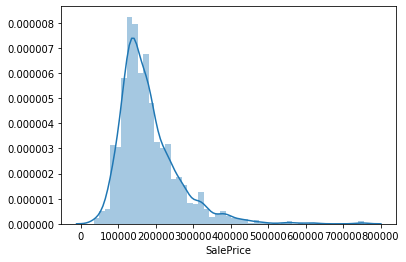

In [257]:
for feats in numFeat:
    if train[feats].nunique()>20:
        sns.distplot(train[feats].dropna())
        plt.show()    

In [258]:
train[catFeat].drop(feats_max, axis=1).isnull().sum()

MSZoning          0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        8
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
KitchenQual       0
Functional        0
GarageType       81
GarageFinish     81
GarageQual       81
GarageCond       81
PavedDrive        0
SaleType          0
SaleCondition     0
dtype: int64

In [389]:
def fillna(df, features):
    for features in features:
        if features  in catFeat:
            df[features]=df[features].fillna(df[features].mode()[0])
            print(f'fillna cat: {features}')
            
        elif features in numFeat:
            df[features]=df[features].fillna(df[features].median())
            print(f'fillna num: {features}')

In [390]:
fillna(train, train.columns)

fillna num: MSSubClass
fillna cat: MSZoning
fillna num: LotFrontage
fillna num: LotArea
fillna cat: Street
fillna cat: Alley
fillna cat: LotShape
fillna cat: LandContour
fillna cat: Utilities
fillna cat: LotConfig
fillna cat: LandSlope
fillna cat: Neighborhood
fillna cat: Condition1
fillna cat: Condition2
fillna cat: BldgType
fillna cat: HouseStyle
fillna num: OverallQual
fillna num: OverallCond
fillna num: YearBuilt
fillna num: YearRemodAdd
fillna cat: RoofStyle
fillna cat: RoofMatl
fillna cat: Exterior1st
fillna cat: Exterior2nd
fillna cat: MasVnrType
fillna num: MasVnrArea
fillna cat: ExterQual
fillna cat: ExterCond
fillna cat: Foundation
fillna cat: BsmtQual
fillna cat: BsmtCond
fillna cat: BsmtExposure
fillna cat: BsmtFinType1
fillna num: BsmtFinSF1
fillna cat: BsmtFinType2
fillna num: BsmtFinSF2
fillna num: BsmtUnfSF
fillna num: TotalBsmtSF
fillna cat: Heating
fillna cat: HeatingQC
fillna cat: CentralAir
fillna cat: Electrical
fillna num: 1stFlrSF
fillna num: 2ndFlrSF
fillna num:

In [391]:
fillna(test, test.columns)

fillna num: MSSubClass
fillna cat: MSZoning
fillna num: LotFrontage
fillna num: LotArea
fillna cat: Street
fillna cat: Alley
fillna cat: LotShape
fillna cat: LandContour
fillna cat: Utilities
fillna cat: LotConfig
fillna cat: LandSlope
fillna cat: Neighborhood
fillna cat: Condition1
fillna cat: Condition2
fillna cat: BldgType
fillna cat: HouseStyle
fillna num: OverallQual
fillna num: OverallCond
fillna num: YearBuilt
fillna num: YearRemodAdd
fillna cat: RoofStyle
fillna cat: RoofMatl
fillna cat: Exterior1st
fillna cat: Exterior2nd
fillna cat: MasVnrType
fillna num: MasVnrArea
fillna cat: ExterQual
fillna cat: ExterCond
fillna cat: Foundation
fillna cat: BsmtQual
fillna cat: BsmtCond
fillna cat: BsmtExposure
fillna cat: BsmtFinType1
fillna num: BsmtFinSF1
fillna cat: BsmtFinType2
fillna num: BsmtFinSF2
fillna num: BsmtUnfSF
fillna num: TotalBsmtSF
fillna cat: Heating
fillna cat: HeatingQC
fillna cat: CentralAir
fillna cat: Electrical
fillna num: 1stFlrSF
fillna num: 2ndFlrSF
fillna num:

In [392]:
test=test.drop(feats_max, axis=1)

In [393]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,4,2010,WD,Normal,142125


In [37]:
type(null_feats)

list

In [38]:
feats_max

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [394]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,82,0,0,144,0,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,...,24,0,0,0,0,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,...,32,0,0,0,0,700,7,2006,WD,Normal


In [395]:
isnull(train, train.columns)

[],

,Series([], dtype: float64)


In [396]:
isnull(test, test.columns)

[],

,Series([], dtype: float64)


In [397]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,82,0,0,144,0,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,...,24,0,0,0,0,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,...,32,0,0,0,0,700,7,2006,WD,Normal


In [398]:
feats_max

[]

In [399]:
def encoding(df, features):
    for features in catFeat:
        if features not in feats_max_test:
            df[features+'_le']=preprocessing.LabelEncoder().fit_transform(df[features])

In [400]:
encoding(train, train.columns)

In [401]:
encoding(test, test.columns)

In [42]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Electrical_le,KitchenQual_le,Functional_le,GarageType_le,GarageFinish_le,GarageQual_le,GarageCond_le,PavedDrive_le,SaleType_le,SaleCondition_le
0,1,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,...,4,2,6,1,1,4,4,2,8,4
1,2,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,4,3,6,1,1,4,4,2,8,4
2,3,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,...,4,2,6,1,1,4,4,2,8,4
3,4,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,...,4,2,6,5,2,4,4,2,8,0
4,5,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,...,4,2,6,1,1,4,4,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Grvl,Reg,Lvl,AllPub,...,4,3,6,1,1,4,4,2,8,4
1456,1457,20,RL,85.0,13175,Pave,Grvl,Reg,Lvl,AllPub,...,4,3,2,1,2,4,4,2,8,4
1457,1458,70,RL,66.0,9042,Pave,Grvl,Reg,Lvl,AllPub,...,4,2,6,1,1,4,4,2,8,4
1458,1459,20,RL,68.0,9717,Pave,Grvl,Reg,Lvl,AllPub,...,0,2,6,1,2,4,4,2,8,4


In [45]:
train[numFeat]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


In [46]:
train.columns.values

array(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'Pav

In [402]:
featsFinal=[features for features in train.columns if train[features].dtypes!='O' and features not in ['Id', 'SalesPrice']]
train[featsFinal]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Electrical_le,KitchenQual_le,Functional_le,GarageType_le,GarageFinish_le,GarageQual_le,GarageCond_le,PavedDrive_le,SaleType_le,SaleCondition_le
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,4,2,6,1,1,4,4,2,8,4
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,4,3,6,1,1,4,4,2,8,4
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,4,2,6,1,1,4,4,2,8,4
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,4,2,6,5,2,4,4,2,8,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,4,2,6,1,1,4,4,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,4,3,6,1,1,4,4,2,8,4
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,4,3,2,1,2,4,4,2,8,4
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,4,2,6,1,1,4,4,2,8,4
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,0,2,6,1,2,4,4,2,8,4


In [403]:
X=train[featsFinal].drop('SalePrice', axis=1)

In [404]:
X.shape

(1460, 74)

In [405]:
x=test[X.columns]

In [406]:
y=train.SalePrice

In [273]:
x

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Electrical_le,KitchenQual_le,Functional_le,GarageType_le,GarageFinish_le,GarageQual_le,GarageCond_le,PavedDrive_le,SaleType_le,SaleCondition_le
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,3,3,6,1,2,3,4,2,8,4
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,3,2,6,1,2,3,4,2,8,4
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,3,3,6,1,0,3,4,2,8,4
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,3,2,6,1,0,3,4,2,8,4
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,3,2,6,1,1,3,4,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,3,3,6,1,2,3,4,2,8,4
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,3,3,6,4,2,3,4,2,8,0
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,3,3,6,5,2,3,4,2,8,0
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,3,3,6,1,2,3,4,2,8,4


In [407]:
def train_val_split(X, y):
    X_train, X_val,y_train, y_val=model_selection.train_test_split(X, y, test_size=0.2, random_state=0)
    print(f'X_train shape: {X_train.shape} \n X_val shape: {X_val.shape} \n y_train shape: {y_train.shape} \n y_val shape:{y_val.shape}')
    print(X_train, X_val, y_train, y_val)    

In [408]:
train_val_split(X,y)

X_train shape: (1168, 74) 
 X_val shape: (292, 74) 
 y_train shape: (1168,) 
 y_val shape:(292,)
      MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
618           20         90.0    11694            9            5       2007   
870           20         60.0     6600            5            5       1962   
92            30         80.0    13360            5            7       1921   
817           20         69.0    13265            8            5       2002   
302           20        118.0    13704            7            5       2001   
...          ...          ...      ...          ...          ...        ...   
763           60         82.0     9430            8            5       1999   
835           20         60.0     9600            4            7       1950   
1216          90         68.0     8930            6            5       1978   
559          120         69.0     3196            7            5       2003   
684           60         58.0    1

In [409]:
def mdlPct(model, X, y):
    X_train, X_val,y_train, y_val=model_selection.train_test_split(X, y, test_size=0.2, random_state=0)
    print(f'X_train shape: {X_train.shape} \n X_val shape: {X_val.shape} \n y_train shape: {y_train.shape} \n y_val shape:{y_val.shape}')
    

    model.fit(X_train, y_train)
    print(f'train score:{model.score(X_train, y_train)}')
    print(f'val score: {model.score(X_val, y_val)}')
    print(f'accuracy train score: {metrics.accuracy_score(X_train, y_train)}')
    print(f'accuracy val score: {metrics.accuracy_score(X_val, y_val)}')
    print(f'confusion matrix train score: {metrics.confusion_matrix(y_train, model.predict(X_train))}')
    print(f'confusion matrix train score: {metrics.confusion_matrix(y_val, model.predict(X_val))}')
    print(f'classification report train score: {metrics.classification_report(y_train, model.predict(X_train))}')
    print(f'classification report train score: {metrics.classification_report(y_val, model.predict(X_val))}')

In [410]:
mdlPct(linear_model.LogisticRegression(), X, y)

X_train shape: (1168, 74) 
 X_val shape: (292, 74) 
 y_train shape: (1168,) 
 y_val shape:(292,)
train score:0.06078767123287671
val score: 0.010273972602739725


ValueError: Classification metrics can't handle a mix of multiclass-multioutput and multiclass targets

In [411]:
mdlPct(linear_model.LinearRegression(), X, y)

X_train shape: (1168, 74) 
 X_val shape: (292, 74) 
 y_train shape: (1168,) 
 y_val shape:(292,)
train score:0.8858474432132474
val score: 0.5833391148894453


ValueError: Classification metrics can't handle a mix of multiclass-multioutput and multiclass targets

In [427]:
def modelPredict(model, X_train, y_train):
    X_train, X_val,y_train, y_val=model_selection.train_test_split(X_train, y_train, test_size=0.2, random_state=0)
    model.fit(X_train, y_train)
    print(f'train score:{model.score(X_train, y_train)}')
    print(f'val score: {model.score(X_val, y_val)}')
    #print(f'accuracy train score: {metrics.accuracy_score(y_train, model.predict(X_train))}')
    #print(f'accuracy train score: {metrics.accuracy_score(y_train, model.predict(X_train))}')
    print(f'mean_absolute_error train: {metrics.mean_absolute_error(y_train, model.predict(X_train))}')
    print(f'mean_absolute_error val: {metrics.mean_absolute_error(y_val, model.predict(X_val))}')
    print(f'mean_squared_error train: {metrics.mean_squared_error(y_train, model.predict(X_train))}')
    print(f'mean_squared_error val: {metrics.mean_squared_error(y_val, model.predict(X_val))}')
    print(f'median_absolute_error train: {metrics.median_absolute_error(y_train, model.predict(X_train))}')
    print(f'median_absolute_error val: {metrics.median_absolute_error(y_val, model.predict(X_val))}')
    print(f'r2 score train: {metrics.r2_score(y_train, model.predict(X_train))}')
    print(f'r2 score train: {metrics.r2_score(y_val, model.predict(X_val))}')
    y_pred=model.predict(x.values)
    print(y_pred)

In [428]:
modelPredict(linear_model.LinearRegression(), X, y )

train score:0.8088092424135376
val score: 0.6905359006215239
mean_absolute_error train: 23693.614643100587
mean_absolute_error val: 26905.839338489666
mean_squared_error train: 1177153882.7154746
mean_squared_error val: 2137112639.5532444
median_absolute_error train: 17888.43631416044
median_absolute_error val: 18944.72994471385
r2 score train: 0.8088092424135376
r2 score train: 0.6905359006215239


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 50 is different from 74)

In [59]:
X_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Electrical_le,KitchenQual_le,Functional_le,GarageType_le,GarageFinish_le,GarageQual_le,GarageCond_le,PavedDrive_le,SaleType_le,SaleCondition_le
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,4,2,6,1,1,4,4,2,8,4
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,4,3,6,1,1,4,4,2,8,4
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,4,2,6,1,1,4,4,2,8,4
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,4,2,6,5,2,4,4,2,8,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,4,2,6,1,1,4,4,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,4,3,6,1,1,4,4,2,8,4
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,4,3,2,1,2,4,4,2,8,4
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,4,2,6,1,1,4,4,2,8,4
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,0,2,6,1,2,4,4,2,8,4


In [414]:
def transformation(df, features):
    for features in df:
        df[features+ '_sc']=preprocessing.StandardScaler().fit_transform(df[features].values.reshape(-1,1))
        #df[features+'_mas']=preprocessing.MaxAbsScaler().fit_transform(df[features].values.reshape(-1,1))
        #df[features+'_sc']=preprocessing.RobustScaler().fit_transform(df[features])
        #df[features+'_norm']=preprocessing.Normalizer().fit_transform(df[features])           

In [415]:
transformation(X, X.columns)

In [416]:
X

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Electrical_le_sc,KitchenQual_le_sc,Functional_le_sc,GarageType_le_sc,GarageFinish_le_sc,GarageQual_le_sc,GarageCond_le_sc,PavedDrive_le_sc,SaleType_le_sc,SaleCondition_le_sc
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0.302403,-0.409369,0.255978,-0.686776,-0.281887,0.215646,0.186019,0.289745,0.313867,0.208502
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0.302403,0.795629,0.255978,-0.686776,-0.281887,0.215646,0.186019,0.289745,0.313867,0.208502
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0.302403,-0.409369,0.255978,-0.686776,-0.281887,0.215646,0.186019,0.289745,0.313867,0.208502
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0.302403,-0.409369,0.255978,1.586905,0.950313,0.215646,0.186019,0.289745,0.313867,-3.426284
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0.302403,-0.409369,0.255978,-0.686776,-0.281887,0.215646,0.186019,0.289745,0.313867,0.208502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0.302403,0.795629,0.255978,-0.686776,-0.281887,0.215646,0.186019,0.289745,0.313867,0.208502
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,0.302403,0.795629,-3.828474,-0.686776,0.950313,0.215646,0.186019,0.289745,0.313867,0.208502
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0.302403,-0.409369,0.255978,-0.686776,-0.281887,0.215646,0.186019,0.289745,0.313867,0.208502
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,-3.503709,-0.409369,0.255978,-0.686776,0.950313,0.215646,0.186019,0.289745,0.313867,0.208502


In [417]:
modelPredict(linear_model.LinearRegression(), X, y)

train score:0.8858474432132474
val score: 0.5833391148893401
mean_absolute_error train: 17254.27642148605
mean_absolute_error val: 24737.68308805025
mean_squared_error train: 702832747.4598552
mean_squared_error val: 2877397558.4431443
median_absolute_error train: 12374.283179803577
median_absolute_error val: 14159.393607011589
r2 score train: 0.8858474432132474
r2 score train: 0.5833391148893401


In [64]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Electrical_le,KitchenQual_le,Functional_le,GarageType_le,GarageFinish_le,GarageQual_le,GarageCond_le,PavedDrive_le,SaleType_le,SaleCondition_le
0,1,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,...,4,2,6,1,1,4,4,2,8,4
1,2,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,4,3,6,1,1,4,4,2,8,4
2,3,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,...,4,2,6,1,1,4,4,2,8,4
3,4,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,...,4,2,6,5,2,4,4,2,8,0
4,5,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,...,4,2,6,1,1,4,4,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Grvl,Reg,Lvl,AllPub,...,4,3,6,1,1,4,4,2,8,4
1456,1457,20,RL,85.0,13175,Pave,Grvl,Reg,Lvl,AllPub,...,4,3,2,1,2,4,4,2,8,4
1457,1458,70,RL,66.0,9042,Pave,Grvl,Reg,Lvl,AllPub,...,4,2,6,1,1,4,4,2,8,4
1458,1459,20,RL,68.0,9717,Pave,Grvl,Reg,Lvl,AllPub,...,0,2,6,1,2,4,4,2,8,4


In [418]:
train1=train[featsFinal]
X=train1.drop('SalePrice', axis=1)

In [419]:
x=test[X.columns]    

In [333]:
X

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Electrical_le,KitchenQual_le,Functional_le,GarageType_le,GarageFinish_le,GarageQual_le,GarageCond_le,PavedDrive_le,SaleType_le,SaleCondition_le
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,4,2,6,1,1,4,4,2,8,4
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,4,3,6,1,1,4,4,2,8,4
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,4,2,6,1,1,4,4,2,8,4
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,4,2,6,5,2,4,4,2,8,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,4,2,6,1,1,4,4,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,4,3,6,1,1,4,4,2,8,4
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,4,3,2,1,2,4,4,2,8,4
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,4,2,6,1,1,4,4,2,8,4
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,0,2,6,1,2,4,4,2,8,4


In [68]:
X.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Electrical_le,KitchenQual_le,Functional_le,GarageType_le,GarageFinish_le,GarageQual_le,GarageCond_le,PavedDrive_le,SaleType_le,SaleCondition_le
MSSubClass,1.000000,-0.356718,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,-0.065649,...,0.051945,0.010129,0.003711,0.090719,0.012301,0.007630,0.002927,-0.059925,0.012464,-0.024940
LotFrontage,-0.356718,1.000000,0.304522,0.234812,-0.053281,0.116685,0.083348,0.178469,0.214367,0.042463,...,0.059572,-0.190232,0.030114,-0.216403,-0.211125,0.049935,0.042740,0.088121,-0.031412,0.058857
LotArea,-0.139781,0.304522,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,...,0.043856,-0.057018,-0.022317,-0.116799,-0.116326,0.017551,0.028106,0.015134,0.012292,0.034169
OverallQual,0.032628,0.234812,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,...,0.254127,-0.555348,0.161047,-0.297995,-0.538529,0.090562,0.144988,0.229393,-0.060472,0.193703
OverallCond,-0.059316,-0.053281,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,...,0.062664,0.067984,0.094040,0.163126,0.191063,-0.094761,-0.032236,-0.062236,0.095267,0.017758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GarageQual_le,0.007630,0.049935,0.017551,0.090562,-0.094761,0.303839,0.130241,0.105904,0.122935,0.044856,...,0.109257,-0.014551,0.021339,-0.219632,-0.153777,1.000000,0.511375,0.167494,-0.029036,0.046204
GarageCond_le,0.002927,0.042740,0.028106,0.144988,-0.032236,0.246576,0.150579,0.067709,0.097105,0.002138,...,0.119467,-0.068412,0.021204,-0.220106,-0.130269,0.511375,1.000000,0.187769,-0.016684,0.018784
PavedDrive_le,-0.059925,0.088121,0.015134,0.229393,-0.062236,0.427561,0.168457,0.144103,0.189545,0.063940,...,0.213025,-0.050971,0.046994,-0.166480,-0.226045,0.167494,0.187769,1.000000,-0.039365,0.071233
SaleType_le,0.012464,-0.031412,0.012292,-0.060472,0.095267,-0.052425,0.019647,-0.055132,0.005532,-0.029973,...,0.009257,0.038590,-0.008221,0.031879,0.047135,-0.029036,-0.016684,-0.039365,1.000000,0.184067


In [79]:
from statsmodels.api import OLS
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [420]:
vif=pd.DataFrame()
vif['vif factor']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['Features']=X.columns
vif

,vif factor,Features
0,14.970967,MSSubClass
1,19.489644,LotFrontage
2,3.435415,LotArea
3,79.216103,OverallQual
4,51.298342,OverallCond
...,...,...
69,70.045321,GarageQual_le
70,91.286711,GarageCond_le
71,22.299848,PavedDrive_le
72,28.224615,SaleType_le


In [421]:
vi=vif.sort_values(by='vif factor',ascending=True).head(50).set_index('Features')
vi

,vif factor
Features,
3SsnPorch,1.064654
MiscVal,1.081795
Utilities_le,1.095881
PoolArea,1.144074
ScreenPorch,1.246067
BsmtHalfBath,1.304740
EnclosedPorch,1.485901
LandSlope_le,1.700767
OpenPorchSF,1.931322


In [422]:
train2=X[vi.index]

In [423]:
X=train2.copy()
X

,3SsnPorch,MiscVal,Utilities_le,PoolArea,ScreenPorch,BsmtHalfBath,EnclosedPorch,LandSlope_le,OpenPorchSF,WoodDeckSF,...,BsmtCond_le,CentralAir_le,SaleType_le,FullBath,MSZoning_le,ExterCond_le,GarageArea,BedroomAbvGr,Exterior2nd_le,ExterQual_le
0,0,0,0,0,0,0,0,0,61,0,...,3,1,8,2,3,4,548,3,13,2
1,0,0,0,0,0,1,0,0,0,298,...,3,1,8,2,3,4,460,3,8,3
2,0,0,0,0,0,0,0,0,42,0,...,3,1,8,2,3,4,608,3,13,2
3,0,0,0,0,0,0,272,0,35,0,...,1,1,8,1,3,4,642,3,15,3
4,0,0,0,0,0,0,0,0,84,192,...,3,1,8,2,3,4,836,4,13,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,0,0,0,0,0,40,0,...,3,1,8,2,3,4,460,3,13,3
1456,0,0,0,0,0,0,0,0,0,349,...,3,1,8,2,3,4,500,3,10,3
1457,0,2500,0,0,0,0,0,0,60,0,...,1,1,8,2,3,2,252,4,5,0
1458,0,0,0,0,0,0,112,0,0,366,...,3,1,8,1,3,4,240,2,8,3


In [429]:
modelPredict(linear_model.LinearRegression(), X, y)

train score:0.8088092424135376
val score: 0.6905359006215239
mean_absolute_error train: 23693.614643100587
mean_absolute_error val: 26905.839338489666
mean_squared_error train: 1177153882.7154746
mean_squared_error val: 2137112639.5532444
median_absolute_error train: 17888.43631416044
median_absolute_error val: 18944.72994471385
r2 score train: 0.8088092424135376
r2 score train: 0.6905359006215239


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 50 is different from 74)

In [340]:
nFeats=[features for features in X.columns if X[features].nunique()>20]

In [341]:
nFeats

['MiscVal',
 'ScreenPorch',
 'EnclosedPorch',
 'OpenPorchSF',
 'WoodDeckSF',
 'MasVnrArea',
 'LotArea',
 'Neighborhood_le',
 'LotFrontage',
 'GarageArea']

In [342]:
X[nFeats].nunique()

MiscVal              21
ScreenPorch          76
EnclosedPorch       120
OpenPorchSF         202
WoodDeckSF          274
MasVnrArea          327
LotArea            1073
Neighborhood_le      25
LotFrontage         110
GarageArea          441
dtype: int64

In [343]:
[variance_inflation_factor(X[nFeats].values, i) for i in range(X[nFeats].shape[1])]

[1.0119894235976987,
 1.1000980979207067,
 1.1728661862133638,
 1.6261804646291902,
 1.7168045200799122,
 1.5446742682393886,
 2.403737012598926,
 4.64308289093471,
 8.089881723441316,
 7.654305977406999]

In [173]:
X1['LotFrontage'].describe()

count    1460.000000
mean       69.863699
std        22.027677
min        21.000000
25%        60.000000
50%        69.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [344]:
OLS(y, X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.963
Method:                 Least Squares   F-statistic:                              761.3
Date:                Tue, 15 Dec 2020   Prob (F-statistic):                        0.00
Time:                        13:34:52   Log-Likelihood:                         -17442.
No. Observations:                1460   AIC:                                  3.498e+04
Df Residuals:                    1410   BIC:                                  3.525e+04
Df Model:                          50                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
3SsnPorch           44.3451     34.569      1.283      0.200     -23.466     112.157
MiscVal             -1.1148      2.044     -0.545      0.586      -5.124       2.895
Utilities_le     -3.482e+04   3.96e+04     -0.880      0.379   -1.12e+05    4.28e+04
PoolArea            20.6913     25.798      0.802      0.423     -29.916      71.299
ScreenPorch         57.5072     18.912      3.041      0.002      20.409      94.606
BsmtHalfBath      4773.8894   4461.260      1.070      0.285   -3977.532    1.35e+04
EnclosedPorch       39.5497     17.626      2.244      0.025       4.974      74.126
LandSlope_le      1132.6928   4457.381      0.254      0.799   -7611.118    9876.504
OpenPorchSF         37.3401     16.567      2.254      0.024       4.841      69.840
WoodDeckSF          28.4691      8.864      3.212      0.001      11.080      45.858
MasVnrArea          58.2527      6.965      8.364      0.000      44.591      71.915
HeatingQC_le     -2145.0784    702.644     -3.053      0.002   -3523.419    -766.737
Fireplaces        1.533e+04   1828.878      8.385      0.000    1.17e+04    1.89e+04
LotArea              0.4510      0.124      3.634      0.000       0.208       0.695
LotShape_le      -1020.7751    782.729     -1.304      0.192   -2556.215     514.664
HalfBath          1.579e+04   2463.921      6.407      0.000     1.1e+04    2.06e+04
BsmtFullBath      1.285e+04   2420.677      5.310      0.000    8104.901    1.76e+04
GarageType_le     -181.1624    689.886     -0.263      0.793   -1534.476    1172.151
RoofStyle_le      6912.3192   1286.330      5.374      0.000    4388.992    9435.646
RoofMatl_le       1.047e+04   1730.502      6.052      0.000    7078.307    1.39e+04
LotConfig_le       379.3426    643.496      0.590      0.556    -882.970    1641.655
BldgType_le      -4327.5186   1630.016     -2.655      0.008   -7525.036   -1130.001
BsmtFinType1_le   -492.2337    665.976     -0.739      0.460   -1798.644     814.176
Neighborhood_le    683.7256    180.240      3.793      0.000     330.158    1037.293
GarageFinish_le   -992.2775   1696.223     -0.585      0.559   -4319.671    2335.116
MoSold             512.8001    371.442      1.381      0.168    -215.838    1241.438
Condition1_le      773.2591   1179.234      0.656      0.512   -1539.983    3086.501
BsmtExposure_le  -4192.1262   1027.562     -4.080      0.000   -6207.842   -2176.410
HouseStyle_le    -1792.7438    730.312     -2.455      0.014   -3225.358    -360.129
Foundation_le     3318.1057   1738.037      1.909      0.056     -91.312    6727.523
MasVnrType_le     9516.5139   1795.172      5.301      0.000    5995.018     1.3e+04
MSSubClass         -12.0103     47.897     -0.251      0.802    -105.967      81.946
SaleCondi

In [345]:
ols=OLS(y, X).fit()

In [346]:
ols_df=pd.DataFrame(ols.pvalues)
ols_df

,0
3SsnPorch,1.997684e-01
MiscVal,5.855468e-01
Utilities_le,3.789137e-01
PoolArea,4.226669e-01
ScreenPorch,2.403037e-03
BsmtHalfBath,2.847680e-01
EnclosedPorch,2.499867e-02
LandSlope_le,7.994428e-01
OpenPorchSF,2.436059e-02
WoodDeckSF,1.349547e-03


In [347]:
ol=pd.DataFrame()
ol=ols_df[ols_df<0.05].dropna().index

In [348]:
X=X[ol]
X.shape

(1460, 29)

In [349]:
X

,ScreenPorch,EnclosedPorch,OpenPorchSF,WoodDeckSF,MasVnrArea,HeatingQC_le,Fireplaces,LotArea,HalfBath,BsmtFullBath,...,KitchenQual_le,LandContour_le,PavedDrive_le,CentralAir_le,FullBath,MSZoning_le,ExterCond_le,GarageArea,BedroomAbvGr,ExterQual_le
0,0,0,61,0,196.0,0,0,8450,1,1,...,2,3,2,1,2,3,4,548,3,2
1,0,0,0,298,0.0,0,1,9600,0,0,...,3,3,2,1,2,3,4,460,3,3
2,0,0,42,0,162.0,0,1,11250,1,1,...,2,3,2,1,2,3,4,608,3,2
3,0,272,35,0,0.0,2,1,9550,0,1,...,2,3,2,1,1,3,4,642,3,3
4,0,0,84,192,350.0,0,1,14260,1,1,...,2,3,2,1,2,3,4,836,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,40,0,0.0,0,1,7917,1,0,...,3,3,2,1,2,3,4,460,3,3
1456,0,0,0,349,119.0,4,2,13175,0,1,...,3,3,2,1,2,3,4,500,3,3
1457,0,0,60,0,0.0,0,2,9042,0,0,...,2,3,2,1,2,3,2,252,4,0
1458,0,112,0,366,0.0,2,0,9717,0,1,...,2,3,2,1,1,3,4,240,2,3


In [350]:
X.columns.values

array(['ScreenPorch', 'EnclosedPorch', 'OpenPorchSF', 'WoodDeckSF',
       'MasVnrArea', 'HeatingQC_le', 'Fireplaces', 'LotArea', 'HalfBath',
       'BsmtFullBath', 'RoofStyle_le', 'RoofMatl_le', 'BldgType_le',
       'Neighborhood_le', 'BsmtExposure_le', 'HouseStyle_le',
       'MasVnrType_le', 'SaleCondition_le', 'BsmtQual_le',
       'KitchenQual_le', 'LandContour_le', 'PavedDrive_le',
       'CentralAir_le', 'FullBath', 'MSZoning_le', 'ExterCond_le',
       'GarageArea', 'BedroomAbvGr', 'ExterQual_le'], dtype=object)

In [351]:
modelPredict(linear_model.LinearRegression(), X, y)

train score:0.8037895056286282
val score: 0.6974641268112598
mean_absolute_error train: 24021.517823142018
mean_absolute_error val: 26484.372615951554
mean_squared_error train: 1208060202.2528799
mean_squared_error val: 2089267348.9702492
median_absolute_error train: 17441.535265450264
median_absolute_error val: 17254.372461803345
r2 score train: 0.8037895056286282
r2 score train: 0.6974641268112598


In [352]:
y_train

618     314813
870     109500
92      163500
817     271000
302     205000
         ...  
763     337000
835     128000
1216    112000
559     234000
684     221000
Name: SalePrice, Length: 1168, dtype: int64

In [353]:
def transformation(df, features):
    for features in df:
        df[features+ '_sc']=preprocessing.StandardScaler().fit_transform(df[features].values.reshape(-1,1))
        #df[features+'_mas']=preprocessing.MaxAbsScaler().fit_transform(df[features].values.reshape(-1,1))
        #df[features+'_sc']=preprocessing.RobustScaler().fit_transform(df[features])
        #df[features+'_norm']=preprocessing.Normalizer().fit_transform(df[features])     

In [354]:
transformation(X, X.columns)

In [106]:
X

,ScreenPorch,LandSlope_le,OpenPorchSF,WoodDeckSF,MasVnrArea,HeatingQC_le,Fireplaces,LotArea,HalfBath,BsmtFullBath,...,RoofMatl_le_sc,LotConfig_le_sc,BldgType_le_sc,BsmtFinType1_le_sc,Neighborhood_le_sc,GarageFinish_le_sc,MoSold_sc,Condition1_le_sc,BsmtExposure_le_sc,Foundation_le_sc
0,0,0,61,0,196.0,0,0,8450,1,1,...,-0.125797,0.604670,-0.411691,-0.429918,-1.206215,-0.281887,-1.599111,-0.036289,0.628912,0.835599
1,0,0,0,298,0.0,0,1,9600,0,0,...,-0.125797,-0.628316,-0.411691,-1.518697,1.954302,-0.281887,-0.489110,-1.188074,-1.128430,-0.549162
2,0,0,42,0,162.0,0,1,11250,1,1,...,-0.125797,0.604670,-0.411691,-0.429918,-1.206215,-0.281887,0.990891,-0.036289,-0.249759,0.835599
3,0,0,35,0,0.0,2,1,9550,0,1,...,-0.125797,-1.861302,-0.411691,-1.518697,-1.039872,0.950313,-1.599111,-0.036289,0.628912,-1.933923
4,0,0,84,192,350.0,0,1,14260,1,1,...,-0.125797,-0.628316,-0.411691,-0.429918,0.457215,-0.281887,2.100892,-0.036289,-2.007101,0.835599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,40,0,0.0,0,1,7917,1,0,...,-0.125797,0.604670,-0.411691,1.203249,-0.707186,-0.281887,0.620891,-0.036289,0.628912,0.835599
1456,0,0,0,349,119.0,4,2,13175,0,1,...,-0.125797,0.604670,-0.411691,-1.518697,0.290872,0.950313,-1.599111,-0.036289,0.628912,-0.549162
1457,0,0,60,0,0.0,0,2,9042,0,0,...,-0.125797,0.604670,-0.411691,-0.429918,-1.039872,-0.281887,-0.489110,-0.036289,0.628912,3.605121
1458,0,0,0,366,0.0,2,0,9717,0,1,...,-0.125797,0.604670,-0.411691,-0.429918,-0.041814,0.950313,-0.859110,-0.036289,-0.249759,-0.549162


In [355]:
X.columns.values

array(['ScreenPorch', 'EnclosedPorch', 'OpenPorchSF', 'WoodDeckSF',
       'MasVnrArea', 'HeatingQC_le', 'Fireplaces', 'LotArea', 'HalfBath',
       'BsmtFullBath', 'RoofStyle_le', 'RoofMatl_le', 'BldgType_le',
       'Neighborhood_le', 'BsmtExposure_le', 'HouseStyle_le',
       'MasVnrType_le', 'SaleCondition_le', 'BsmtQual_le',
       'KitchenQual_le', 'LandContour_le', 'PavedDrive_le',
       'CentralAir_le', 'FullBath', 'MSZoning_le', 'ExterCond_le',
       'GarageArea', 'BedroomAbvGr', 'ExterQual_le', 'ScreenPorch_sc',
       'EnclosedPorch_sc', 'OpenPorchSF_sc', 'WoodDeckSF_sc',
       'MasVnrArea_sc', 'HeatingQC_le_sc', 'Fireplaces_sc', 'LotArea_sc',
       'HalfBath_sc', 'BsmtFullBath_sc', 'RoofStyle_le_sc',
       'RoofMatl_le_sc', 'BldgType_le_sc', 'Neighborhood_le_sc',
       'BsmtExposure_le_sc', 'HouseStyle_le_sc', 'MasVnrType_le_sc',
       'SaleCondition_le_sc', 'BsmtQual_le_sc', 'KitchenQual_le_sc',
       'LandContour_le_sc', 'PavedDrive_le_sc', 'CentralAir_le_sc',
   

In [357]:
Xd=X.drop(['ScreenPorch', 'EnclosedPorch', 'OpenPorchSF', 'WoodDeckSF',
       'MasVnrArea', 'HeatingQC_le', 'Fireplaces', 'LotArea', 'HalfBath',
       'BsmtFullBath', 'RoofStyle_le', 'RoofMatl_le', 'BldgType_le',
       'Neighborhood_le', 'BsmtExposure_le', 'HouseStyle_le',
       'MasVnrType_le', 'SaleCondition_le', 'BsmtQual_le',
       'KitchenQual_le', 'LandContour_le', 'PavedDrive_le',
       'CentralAir_le', 'FullBath', 'MSZoning_le', 'ExterCond_le',
       'GarageArea', 'BedroomAbvGr', 'ExterQual_le'], axis=1)

In [358]:
modelPredict(linear_model.LinearRegression(), Xd, y)

train score:0.8037895056286282
val score: 0.6974641268112539
mean_absolute_error train: 24021.517823141985
mean_absolute_error val: 26484.37261595154
mean_squared_error train: 1208060202.2528799
mean_squared_error val: 2089267348.9702892
median_absolute_error train: 17441.535265452716
median_absolute_error val: 17254.37246180183
r2 score train: 0.8037895056286282
r2 score train: 0.6974641268112539


In [265]:
Xd.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass_sc,1460.0,-1.504124e-16,1.000343,-0.872563,-0.872563,-0.163109,0.309859,3.147673
LotFrontage_sc,1460.0,2.801602e-16,1.000343,-2.219047,-0.447940,-0.039223,0.414907,11.041546
LotArea_sc,1460.0,-4.202783e-17,1.000343,-0.923729,-0.296991,-0.104063,0.108708,20.518273
OverallQual_sc,1460.0,-7.680310e-17,1.000343,-3.688413,-0.795151,-0.071836,0.651479,2.821425
OverallCond_sc,1460.0,3.692632e-16,1.000343,-4.112970,-0.517200,-0.517200,0.381743,3.078570
YearBuilt_sc,1460.0,1.032983e-15,1.000343,-3.287824,-0.571923,0.057371,0.951632,1.282839
MasVnrArea_sc,1460.0,-3.939010e-17,1.000343,-0.570750,-0.570750,-0.570750,0.338369,8.285201
1stFlrSF_sc,1460.0,7.686013e-17,1.000343,-2.144172,-0.726156,-0.195693,0.591590,9.132681
2ndFlrSF_sc,1460.0,-3.269835e-17,1.000343,-0.795163,-0.795163,-0.795163,0.873112,3.936963
GrLivArea_sc,1460.0,-1.446332e-16,1.000343,-2.249120,-0.734749,-0.097970,0.497404,7.855574


In [359]:
Xd

,ScreenPorch_sc,EnclosedPorch_sc,OpenPorchSF_sc,WoodDeckSF_sc,MasVnrArea_sc,HeatingQC_le_sc,Fireplaces_sc,LotArea_sc,HalfBath_sc,BsmtFullBath_sc,...,KitchenQual_le_sc,LandContour_le_sc,PavedDrive_le_sc,CentralAir_le_sc,FullBath_sc,MSZoning_le_sc,ExterCond_le_sc,GarageArea_sc,BedroomAbvGr_sc,ExterQual_le_sc
0,-0.270208,-0.359325,0.216503,-0.752176,0.514104,-0.884658,-0.951226,-0.207142,1.227585,1.107810,...,-0.409369,0.314667,0.289745,0.263813,0.789741,-0.045532,0.364207,0.351000,0.163779,-0.777976
1,-0.270208,-0.359325,-0.704483,1.626195,-0.570750,-0.884658,0.600495,-0.091886,-0.761621,-0.819964,...,0.795629,0.314667,0.289745,0.263813,0.789741,-0.045532,0.364207,-0.060731,0.163779,0.663451
2,-0.270208,-0.359325,-0.070361,-0.752176,0.325915,-0.884658,0.600495,0.073480,1.227585,1.107810,...,-0.409369,0.314667,0.289745,0.263813,0.789741,-0.045532,0.364207,0.631726,0.163779,-0.777976
3,-0.270208,4.092524,-0.176048,-0.752176,-0.570750,0.265476,0.600495,-0.096897,-0.761621,1.107810,...,-0.409369,0.314667,0.289745,0.263813,-1.026041,-0.045532,0.364207,0.790804,0.163779,0.663451
4,-0.270208,-0.359325,0.563760,0.780197,1.366489,-0.884658,0.600495,0.375148,1.227585,1.107810,...,-0.409369,0.314667,0.289745,0.263813,0.789741,-0.045532,0.364207,1.698485,1.390023,-0.777976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.270208,-0.359325,-0.100558,-0.752176,-0.570750,-0.884658,0.600495,-0.260560,1.227585,-0.819964,...,0.795629,0.314667,0.289745,0.263813,0.789741,-0.045532,0.364207,-0.060731,0.163779,0.663451
1456,-0.270208,-0.359325,-0.704483,2.033231,0.087911,1.415610,2.152216,0.266407,-0.761621,1.107810,...,0.795629,0.314667,0.289745,0.263813,0.789741,-0.045532,0.364207,0.126420,0.163779,0.663451
1457,-0.270208,-0.359325,0.201405,-0.752176,-0.570750,-0.884658,2.152216,-0.147810,-0.761621,-0.819964,...,-0.409369,0.314667,0.289745,0.263813,0.789741,-0.045532,-2.369689,-1.033914,1.390023,-3.660830
1458,-0.270208,1.473789,-0.704483,2.168910,-0.570750,0.265476,-0.951226,-0.080160,-0.761621,1.107810,...,-0.409369,0.314667,0.289745,0.263813,-1.026041,-0.045532,0.364207,-1.090059,-1.062465,0.663451


In [430]:
x

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Electrical_le,KitchenQual_le,Functional_le,GarageType_le,GarageFinish_le,GarageQual_le,GarageCond_le,PavedDrive_le,SaleType_le,SaleCondition_le
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,3,3,6,1,2,3,4,2,8,4
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,3,2,6,1,2,3,4,2,8,4
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,3,3,6,1,0,3,4,2,8,4
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,3,2,6,1,0,3,4,2,8,4
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,3,2,6,1,1,3,4,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,3,3,6,1,2,3,4,2,8,4
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,3,3,6,4,2,3,4,2,8,0
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,3,3,6,5,2,3,4,2,8,0
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,3,3,6,1,2,3,4,2,8,4


In [432]:
transformation(x, x.columns)

In [433]:
x

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Electrical_le_sc,KitchenQual_le_sc,Functional_le_sc,GarageType_le_sc,GarageFinish_le_sc,GarageQual_le_sc,GarageCond_le_sc,PavedDrive_le_sc,SaleType_le_sc,SaleCondition_le_sc
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0.296079,0.770002,0.25839,-0.689701,0.933169,0.250409,0.186902,0.339114,0.32475,0.201383
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0.296079,-0.422602,0.25839,-0.689701,0.933169,0.250409,0.186902,0.339114,0.32475,0.201383
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0.296079,0.770002,0.25839,-0.689701,-1.491575,0.250409,0.186902,0.339114,0.32475,0.201383
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,0.296079,-0.422602,0.25839,-0.689701,-1.491575,0.250409,0.186902,0.339114,0.32475,0.201383
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,0.296079,-0.422602,0.25839,-0.689701,-0.279203,0.250409,0.186902,0.339114,0.32475,0.201383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0.296079,0.770002,0.25839,-0.689701,0.933169,0.250409,0.186902,0.339114,0.32475,0.201383
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,0.296079,0.770002,0.25839,1.004363,0.933169,0.250409,0.186902,0.339114,0.32475,-3.589818
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,0.296079,0.770002,0.25839,1.569051,0.933169,0.250409,0.186902,0.339114,0.32475,-3.589818
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,0.296079,0.770002,0.25839,-0.689701,0.933169,0.250409,0.186902,0.339114,0.32475,0.201383


In [434]:
x=x[Xd.columns]
x

,ScreenPorch_sc,EnclosedPorch_sc,OpenPorchSF_sc,WoodDeckSF_sc,MasVnrArea_sc,HeatingQC_le_sc,Fireplaces_sc,LotArea_sc,HalfBath_sc,BsmtFullBath_sc,...,KitchenQual_le_sc,LandContour_le_sc,PavedDrive_le_sc,CentralAir_le_sc,FullBath_sc,MSZoning_le_sc,ExterCond_le_sc,GarageArea_sc,BedroomAbvGr_sc,ExterQual_le_sc
0,1.818960,-0.360738,-0.701628,0.366678,-0.563316,1.415522,-0.898055,0.363929,-0.751040,-0.818068,...,0.770002,0.31870,0.339114,0.272716,-1.028720,-1.501777,0.388852,1.185921,-1.029543,0.673548
1,-0.301543,-0.360738,-0.178826,2.347867,0.047057,1.415522,-0.898055,0.897861,1.237648,-0.818068,...,-0.422602,0.31870,0.339114,0.272716,-1.028720,-0.039098,0.388852,-0.741235,0.175997,0.673548
2,-0.301543,-0.360738,-0.207871,0.930495,-0.563316,0.269754,0.647066,0.809646,1.237648,-0.818068,...,0.770002,0.31870,0.339114,0.272716,0.773083,-0.039098,0.388852,0.042537,0.175997,0.673548
3,-0.301543,-0.360738,-0.178826,2.089451,-0.450284,-0.876014,0.647066,0.032064,1.237648,-0.818068,...,-0.422602,0.31870,0.339114,0.272716,0.773083,-0.039098,0.388852,-0.012788,0.175997,0.673548
4,2.243060,-0.360738,0.489198,-0.729632,-0.563316,-0.876014,-0.898055,-0.971808,-0.751040,-0.818068,...,-0.422602,-2.53396,0.339114,0.272716,0.773083,-0.039098,0.388852,0.153187,-1.029543,-0.734340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,-0.301543,-0.360738,-0.701628,-0.729632,-0.563316,0.269754,-0.898055,-1.591330,1.237648,-0.818068,...,0.770002,0.31870,0.339114,0.272716,-1.028720,1.423581,0.388852,-2.179687,0.175997,0.673548
1455,-0.301543,-0.360738,-0.353093,-0.729632,-0.563316,1.415522,-0.898055,-1.599808,1.237648,-0.818068,...,0.770002,0.31870,0.339114,0.272716,-1.028720,1.423581,0.388852,-0.861106,0.175997,0.673548
1456,-0.301543,-0.360738,-0.701628,2.982161,-0.563316,-0.876014,0.647066,2.055150,-0.751040,1.067495,...,0.770002,0.31870,0.339114,0.272716,-1.028720,-0.039098,0.388852,0.475916,1.381537,0.673548
1457,-0.301543,-0.360738,-0.236915,-0.103169,-0.563316,1.415522,-0.898055,0.125527,-0.751040,-0.818068,...,0.770002,0.31870,0.339114,0.272716,-1.028720,-0.039098,0.388852,-2.179687,0.175997,0.673548


In [435]:
X_train, X_val,y_train, y_val=model_selection.train_test_split(Xd, y, test_size=0.2, random_state=0)
print(f'X_train shape: {X_train.shape} \n X_val shape: {X_val.shape} \n y_train shape: {y_train.shape} \n y_val shape:{y_val.shape}')
print(X_train, X_val, y_train, y_val)    

X_train shape: (1168, 29) 
 X_val shape: (292, 29) 
 y_train shape: (1168,) 
 y_val shape:(292,)
      ScreenPorch_sc  EnclosedPorch_sc  OpenPorchSF_sc  WoodDeckSF_sc  \
618         4.394446         -0.359325        0.926116      -0.752176   
870        -0.270208         -0.359325       -0.704483      -0.752176   
92         -0.270208          0.360827       -0.704483      -0.752176   
817        -0.270208         -0.359325        0.186307       0.444991   
302        -0.270208         -0.359325        0.518466       2.982983   
...              ...               ...             ...            ...   
763         2.959168         -0.359325        1.228078      -0.752176   
835        -0.270208         -0.359325       -0.704483       1.562346   
1216       -0.270208         -0.359325       -0.704483      -0.752176   
559        -0.270208         -0.359325       -0.402520       0.389123   
684        -0.270208         -0.359325        0.518466      -0.752176   

      MasVnrArea_sc  Heati

In [449]:
def ridgeLasso(X_train, y_train, alpha):
    ridge=linear_model.Ridge(alpha)
    ridge.fit(X_train, y_train)
    print(f'ridge train score: {ridge.score(X_train, y_train)}')
    print(f'ridge validation score: {ridge.score(X_val, y_val)}')
    print(f'ridge train MAE  : {metrics.mean_absolute_error(y_train, ridge.predict(X_train))}')
    print(f'ridge val MAE  : {metrics.mean_absolute_error(y_val, ridge.predict(X_val))}')
    print(f'ridge train MSE  : {metrics.mean_squared_error(y_train, ridge.predict(X_train))}')
    print(f'ridge val MSE  : {metrics.mean_squared_error(y_val, ridge.predict(X_val))}')
    print(f'ridge train MSLE  : {metrics.mean_squared_log_error(y_train, ridge.predict(X_train))}')
    print(f'ridge val MSLE  : {metrics.mean_squared_log_error(y_val, ridge.predict(X_val))}')
    print(f'ridge train MEDIAN_AE  : {metrics.median_absolute_error(y_train, ridge.predict(X_train))}')
    print(f'ridge val MEDIAN_AE  : {metrics.median_absolute_error(y_val, ridge.predict(X_val))}')
    print(f'ridge val MEDIAN_AE  : {metrics.mean_poisson_deviance(y_val, ridge.predict(X_val))}')
    y_pred=ridge.predict(x.values)
    pd.DataFrame(y_pred).to_csv('ridgepred.csv')
    lasso=linear_model.Lasso(alpha)
    lasso.fit(X_train, y_train)
    print(f'lasso train score: {lasso.score(X_train, y_train)}')
    print(f'lasso validation score: {lasso.score(X_val, y_val)}')
    print(f'lasso train MAE  : {metrics.mean_absolute_error(y_train, lasso.predict(X_train))}')
    print(f'lasso val MAE  : {metrics.mean_absolute_error(y_val, lasso.predict(X_val))}')
    print(f'lasso train MSE  : {metrics.mean_squared_error(y_train, lasso.predict(X_train))}')
    print(f'lasso val MSE  : {metrics.mean_squared_error(y_val, lasso.predict(X_val))}')
    print(f'lasso train MSLE  : {metrics.mean_squared_log_error(y_train, lasso.predict(X_train))}')
    print(f'lasso val MSLE  : {metrics.mean_squared_log_error(y_val, lasso.predict(X_val))}')
    print(f'lasso train MEDIAN_AE  : {metrics.median_absolute_error(y_train, lasso.predict(X_train))}')
    print(f'lasso val MEDIAN_AE  : {metrics.median_absolute_error(y_val, lasso.predict(X_val))}')
    print(f'lasso val MEDIAN_AE  : {metrics.mean_poisson_deviance(y_val, lasso.predict(X_val))}')

In [450]:
ridgeLasso(X_train, y_train, 0.001)

ridge train score: 0.8037895056285367
ridge validation score: 0.697464170031479
ridge train MAE  : 24021.515641339447
ridge val MAE  : 26484.36661247269
ridge train MSE  : 1208060202.2534432
ridge val MSE  : 2089267050.4978998
ridge train MSLE  : 0.035803799186368154
ridge val MSLE  : 0.04090157582254529
ridge train MEDIAN_AE  : 17441.53350691821
ridge val MEDIAN_AE  : 17254.391903976706
ridge val MEDIAN_AE  : 7917.110280609334
lasso train score: 0.8037895056286248
lasso validation score: 0.6974641281670401
lasso train MAE  : 24021.517613788154
lasso val MAE  : 26484.37206075435
lasso train MSE  : 1208060202.2529004
lasso val MSE  : 2089267339.6074336
lasso train MSLE  : 0.03580380992120647
lasso val MSLE  : 0.0409015955605568
lasso train MEDIAN_AE  : 17441.53417885615
lasso val MEDIAN_AE  : 17254.376138424734
lasso val MEDIAN_AE  : 7917.112607106905


In [451]:
ridgPred=pd.read_csv('ridgepred.csv')['0']
ridgPred

0       124402.159720
1       152703.616258
2       186374.168914
3       184966.516401
4       163467.375648
            ...      
1454     66816.658009
1455     64936.798728
1456    166064.069975
1457     95831.244711
1458    208368.029647
Name: 0, Length: 1459, dtype: float64

In [454]:
pd.DataFrame(dict(SalePrice=ridgPred.values), index=test['Id']).to_csv('R.csv')

In [187]:
test['Id'].shape

(1459,)